## ML4DS Lab: Week 3: Classification Part 1.

### Aims:
    * Practice K-Nearest Neighbour.
    * Practice Logistic Regression.
    * Compare classifiers with ROC and AUC.


### Task 1: K - Nearest Neighbours

#### Task 1.1: Import and load the data:

In [3]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Height')

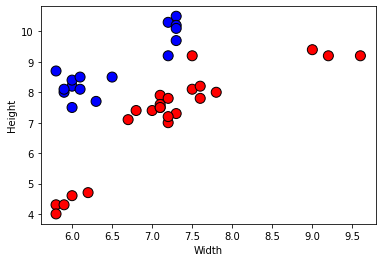

In [5]:
import numpy as np
# %matplotlib inline
import pylab as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

data = np.loadtxt('week3_orange_lemon.txt',delimiter=',') # load fruit data
X = data[:,1:3]
t = data[:,0]
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlabel('Width')
plt.ylabel('Height')

#### Task 1.2: Use K-NN to classify orange and lemon data.

In [39]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Text(0.5, 1.0, 'KNN (k = 11)')

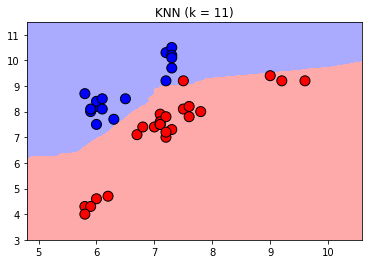

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

n_neighbors = 11
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X, t)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)"
          % (n_neighbors))

#### Task 1.3: Use cross-validation to determine the number of neighbours.

0.022222222222222143


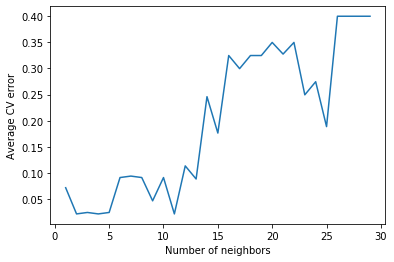

In [41]:
cv_scores = []
for i in range(1,30,1):
    knn_cv = KNeighborsClassifier(n_neighbors=i)
    cv_scores.append(1-np.mean(cross_val_score(knn_cv, X, t, cv=5)))
    
plt.plot(np.arange(1,30,1),cv_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Average CV error')
print(np.min(cv_scores))

In [1]:
n_neighbors = 40
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X, t)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)"
          % (n_neighbors))

NameError: name 'KNeighborsClassifier' is not defined

#### Task 1.4: Try out the 'weight' parameter:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Text(0.5, 1.0, 'KNN (k = 40)')

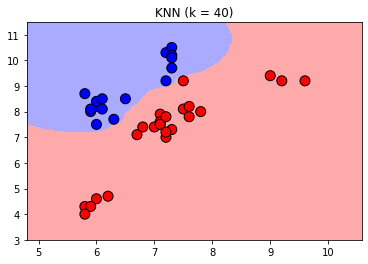

In [43]:
n_neighbors = 40
clf = KNeighborsClassifier(n_neighbors, weights="distance")
clf.fit(X, t)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)" % (n_neighbors))

### Task 2: Logistic Regression.

#### Task 2.1: Train Logistic Regression classifier:

5-fold averae CV error: 0.025000000000000022


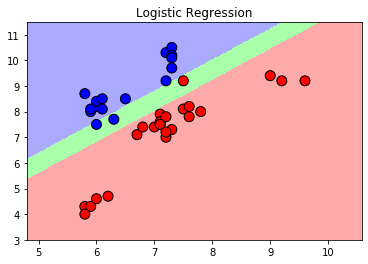

In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, t)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression")
mean_cv_score = np.mean( cross_val_score(clf, X, t, cv=5) )
print("5-fold averae CV error:", 1-mean_cv_score)

#### Task 2.2: L2 Reguralized Logistic Regression.

In [45]:
from sklearn.svm import l1_min_c
from sklearn.model_selection import GridSearchCV
cs = l1_min_c(X, t, loss='log')*np.logspace(0, 7, 16)
print(cs)

[2.89435601e-02 8.47653998e-02 2.48247728e-01 7.27029358e-01
 2.12921058e+00 6.23570098e+00 1.82621518e+01 5.34833516e+01
 1.56633727e+02 4.58724513e+02 1.34344105e+03 3.93446133e+03
 1.15226388e+04 3.37457135e+04 9.88292004e+04 2.89435601e+05]


5-fold averae CV error: 0.025000000000000022


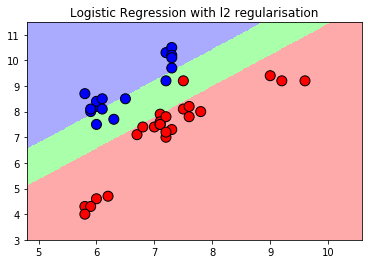

In [49]:
parameters = {'C':cs}
logit_reg =  LogisticRegression(penalty='l2', tol=1e-5, max_iter=1e4)
clf = GridSearchCV(logit_reg, parameters, cv=5)
clf.fit(X,t)

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape) # Put the result into a color plot
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100) # Plot also the training points
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression with l2 regularisation")
print("5-fold averae CV error:", 1-clf.best_score_)


### Task 3: Compare classifiers with ROC and AUC.

#### Task 3.1: ROC and AUC on Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer.data
t = breast_cancer.target

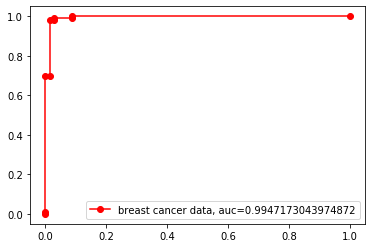

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,t,test_size=0.30, random_state=123)
clf1 = LogisticRegression().fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred_proba1 = clf1.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr1,tpr1,'ro-',label="breast cancer data, auc="+str(auc1))
plt.legend(loc=4)
plt.show()

#### Task 3.2: ROC and AUC on K-Nearest Neighbours.

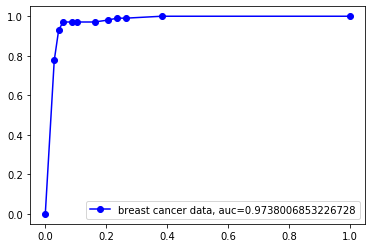

In [29]:
clf2 = KNeighborsClassifier(10).fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)
y_pred_proba2 = clf2.predict_proba(X_test)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr2,tpr2,'bo-',label="breast cancer data, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

#### Task 3.3: Comparison of Logistic Regression and K-NN ROCs.

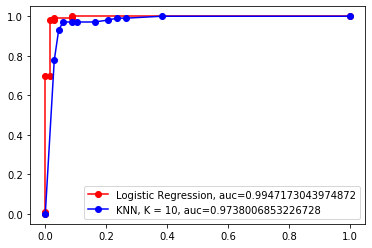

In [30]:
plt.plot(fpr1,tpr1,'ro-',label="Logistic Regression, auc="+str(auc1))
plt.plot(fpr2,tpr2,'bo-',label="KNN, K = 10, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

#### Task 3.4: Do cross validation using AUC as performance metric.